<a href="https://colab.research.google.com/github/GustavoARodri/Previsao-da-Qualidade-do-Leite-IA/blob/main/MilkPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TREINO E ANALISE DA QUALIDADE DO LEITE 🥛

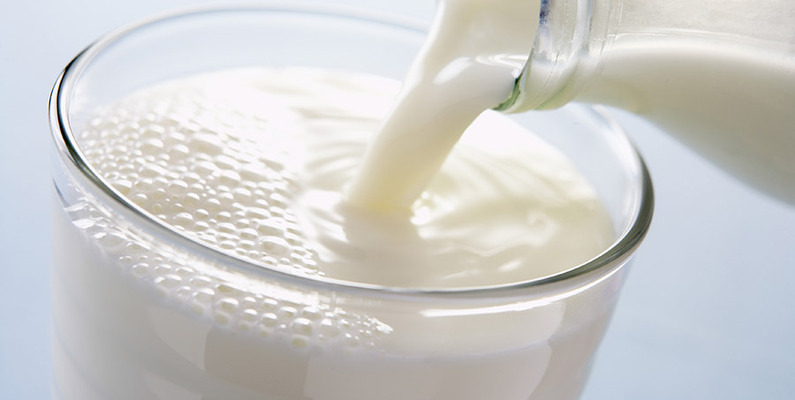

# ANALISE E TRATAMENTO DOS DADOS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Só precisei do pandas em questão de tratamento de DataFrame, já veio muito bem tratado e não precisei alterar muita coisa, seaborn e matplotlib para plotar gráficos e o heatmap

In [ ]:
df = pd.read_csv("milknew.csv")
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


pH do leite, Temperatura, Gosto, Cheiro, Gordura, Turbidez, Cor e a Nota. O objetivo é prever qual nota o leite consegue, low é um leite ruim, medium é um leite mediano e high é um leite excelente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


Apenas pH como float, o resto das features são inteiros e a Nota é tipo object já que são strings. Se Sabor, Odor, Gordura e Turbidez estiverem em condições ideais, eles atribuirão 1, caso contrário, 0.


In [ ]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Sem valores nulos

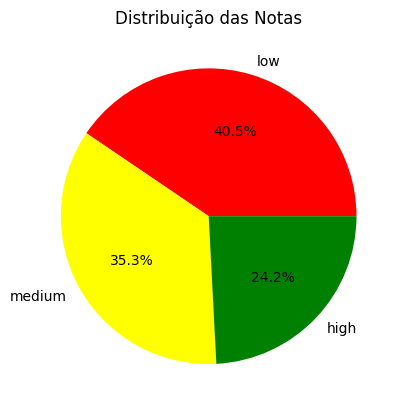

In [ ]:
grade_counts = df['Grade'].value_counts()

plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%',colors=['red','yellow','green'])
plt.title('Distribuição das Notas')

plt.show()

As Notas(Grade) estão bem equilibradas, mas têm bastante low e medium comparado com o high

In [ ]:
df['Grade'] = df['Grade'].map({'low': 0, 'medium': 1, 'high': 2})

Fiz o mapeamento das notas: low(ruim) recebe o valor 0, medium(mediano) recebe o valor 1 e high(excelente) recebe o valor 2

In [ ]:
X = df.drop('Grade', axis=1)
y = df['Grade']

Separei as features, X para features importantes menos a Nota, a Nota foi colocado na variável y

In [ ]:
y

0       2
1       2
2       0
3       0
4       1
       ..
1054    1
1055    2
1056    0
1057    2
1058    0
Name: Grade, Length: 1059, dtype: int64

Todas as strings [low, medium, high] foram trocadas respectivamente por 0,1,2

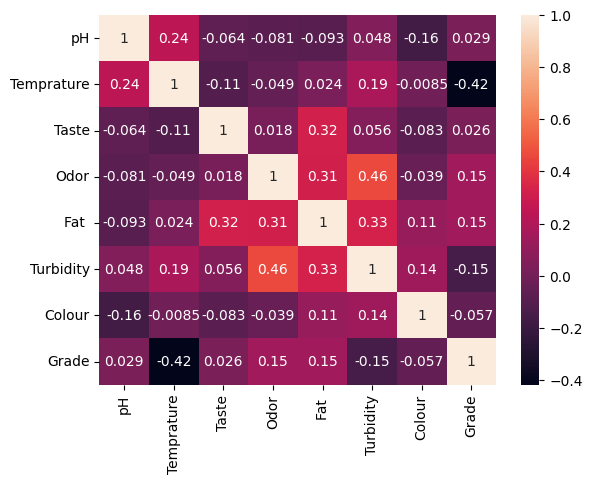

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

Aspectos importante a ser notado: Temperatura é muito inversamente correlacionado a qualidade do leite(Grade) quanto maior a temperatura maior a chance de ser uma nota ruim(low Grade), Turbidez é muito correlacionado com o cheiro e com gordura, Gordura correlacionada com o Gosto e o Cheiro, Temperatura é correlacionada ao pH

# Treinamento dos modelos e Teste das Acurácias/Precisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

Utilizei o holdOut para o treinamento, RandomForestClassifier como modelo e utilizei 3 métricas, accuracy_score, precision_score e f1_score para medir a acurácia/precisão do modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

Separar entre treino e test com o HoldOut

In [ ]:
rf = RandomForestClassifier()

Instanciei rf como modelo do RandomForestClassifier

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

Realizei o treinamento usando o .fit utilizando apenas os dados de treinamento que foram separados, note que não precisei colocar parâmetros pois consegui uma boa acurácia, mas nem sempre é assim

In [ ]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='macro')

print("Metrica Accuracy:",accuracy)
print("Metrica Precision:",precision)
print("Metrica f1_score:",f1_score)

Metrica Accuracy: 0.9905660377358491
Metrica Precision: 0.9908048722235491
Metrica f1_score: 0.9907488764400784


Utilizei o .predict com os dados de test para ele prever baseado em dados que foram ocultados/usados para teste, em todos as métricas consegui 99% de precisão/acurácia, ou seja, o modelo está excelente.